## Reaching Task: Exercise 1
Submitted by **Mohammed Abbas Ansari, Kai Rothe**

### Task 1: Relevant Section of Code

#### Implementation of Perturbation:
```python
if perturbation_mode:
    if perturbation_type == 'sudden':
        #sudden clockwise perturbation of perturbation_angle
        perturbed_mouse_angle = mouse_angle + perturbation_angle

    elif perturbation_type == 'gradual':   
        #gradual counterclockwise perturbation of perturbation_angle in 10 steps, with perturbation_angle/10, each step lasts 3 attempts
        perturbed_mouse_angle = mouse_angle - perturbation_angle * min(gradual_attempts // 3, 10) / 10

    perturbed_mouse_pos = (START_POSITION[0] + distance * math.cos(perturbed_mouse_angle), 
                            START_POSITION[1] + distance * math.sin(perturbed_mouse_angle))
    
    circle_pos = perturbed_mouse_pos
```

#### Error Angle Computation:
```python
error_angle = math.atan2(circle_pos[1] - START_POSITION[1], circle_pos[0] - START_POSITION[0]) - math.atan2(new_target[1] - START_POSITION[1], new_target[0] - START_POSITION[0])
```

#### Motor Variability Computation and Plotting:
```python
error_angles = np.degrees(np.array(error_angles))
move_faster_events = np.array(move_faster_events)
attempts = np.arange(1, len(error_angles) + 1)

motor_variabilities = []
for i in [0, 40, 80, 120]:
    motor_variabilities.append(np.var(error_angles[i:i+40]))

fig = plt.figure()
plt.plot(attempts[~move_faster_events], error_angles[~move_faster_events], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events], error_angles[move_faster_events], 'x', linestyle="", color = "red", label = "Too Slow")

plt.axvline(x=40, color='black', linestyle='-')
plt.text(41, plt.ylim()[1] + 1, 'gradual\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')
plt.axvline(x=80, color='black', linestyle='-')
plt.text(81, plt.ylim()[1] + 1, 'no\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')
plt.axvline(x=120, color='black', linestyle='-')
plt.text(121, plt.ylim()[1] + 1, 'sudden\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')
plt.axvline(x=160, color='black', linestyle='-')
plt.text(161, plt.ylim()[1] + 1, 'no\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')

plt.ylim(plt.ylim()[0], plt.ylim()[1] + 1.5)
plt.xlim(0, ATTEMPTS_LIMIT)
plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', loc = "lower right")
plt.tight_layout()
```

### Task 2: Analysis of experiment on unbiased subjects

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Error Angles Plot Over Attempts

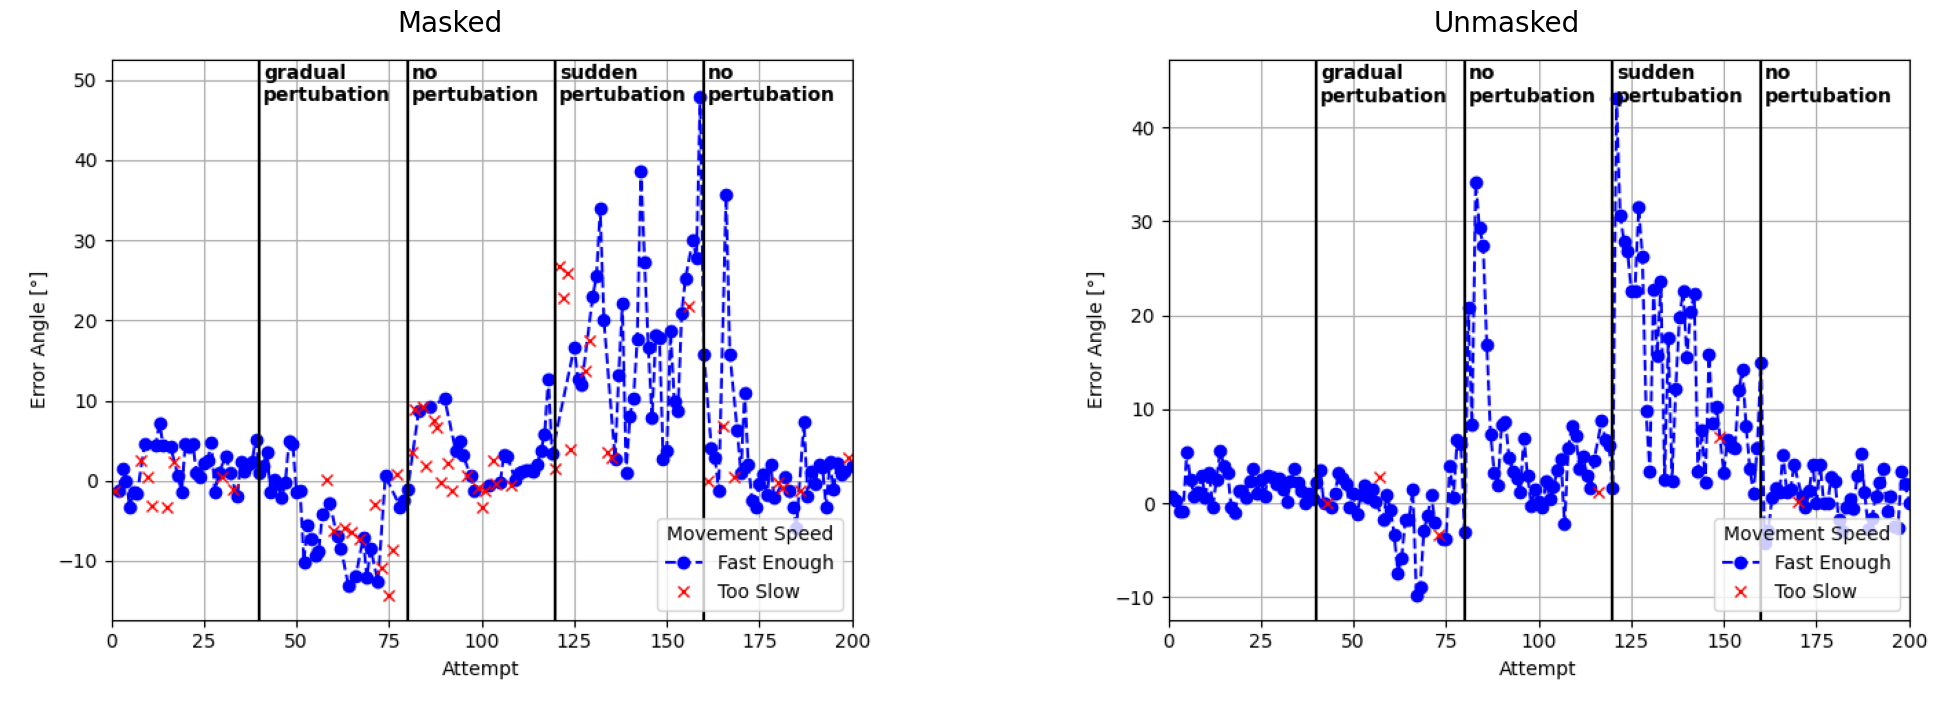

In [15]:
masked_result = plt.imread("errorsexp0.png")
unmasked_result = plt.imread("errorsexp1.png")

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.imshow(masked_result)
plt.title("Masked", fontsize=20)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(unmasked_result)
plt.title("Unmasked", fontsize=20)
plt.axis("off")

plt.show()

**Observation of subject's movement in unmasked experiment:** 

With unmasking, the subject is able to visually see the cursor reach the target. For our subject, that made the task easier: In the unmasked case we observe faster movements, as seen by comparing the number of "too slow" events (red crosses) in the masked and unmasked case. In the unmasked case, the subject learns during sudden pertubation, but in the masked case not (no adaption). We observe after-affects only after the gradual pertubation, which is higher for the unmasked case. The last observation might be explained by the fact that the subject moves in the masked case much more often too slow (lots of red crosses during gradual pertubations and the after-effect compared to the masked case).

#### Motor Variability

We compute motor variability in the unperturbed segments as the variance of the error angle in all valid attempts (fast enough) made during unperturbed trials.


$$ MV = \text{Var}(\theta_{\text{error}}) $$

where $\theta_{\text{error}}$ represents the error angles during unperturbed trials.

In [20]:
move_faster_masked = pd.read_csv("move_faster_exp0.csv").to_numpy(dtype="bool").flatten()
error_angles_masked = pd.read_csv("error_angles_exp0.csv").to_numpy(dtype="float").flatten()
move_faster_unmasked = pd.read_csv("move_faster_exp1.csv").to_numpy(dtype="bool").flatten()
error_angles_unmasked = pd.read_csv("error_angles_exp1.csv").to_numpy(dtype="float").flatten()

unperturbed_segments_idx = [(0, 40), (80, 120), (160, 200)]
valid_unperturbed_error_angles_masked = []
valid_unperturbed_error_angles_unmasked = []
for start, end in unperturbed_segments_idx:
    valid_unperturbed_error_angles_masked.extend(error_angles_masked[start:end][~move_faster_masked[start:end]])
    valid_unperturbed_error_angles_unmasked.extend(error_angles_unmasked[start:end][~move_faster_unmasked[start:end]])
    
motor_variability_masked = np.var(valid_unperturbed_error_angles_masked)
motor_variability_unmasked = np.var(valid_unperturbed_error_angles_unmasked)

print(f"Motor Variability during unperturbed segments in Masked Experiment: {motor_variability_masked}")
print(f"Motor Variability during unperturbed segments in Unmasked Experiment: {motor_variability_unmasked}")

Motor Variability during unperturbed segments in Masked Experiment: 25.29705352420455
Motor Variability during unperturbed segments in Unmasked Experiment: 41.79375324761871


### Task 3:

When the gradual pertubation is introduced, we observe a gradual increase in error magnitude until in the last few attempts the error magnitude starts to decrease again (both for masked and unmasked case). When the sudden pertubation is introduced, we observe a sudden increase in error magnitude, without any adaptation observed in the masked case, but clear learning in the unmasked case. This might be explained by slow learning of the subject, noticing changes slower than 3 attempts (thus error magnitude builds up during gradual pertubation); and that the unmasked case is easier. 

We don't observe a significant after-effect after only for gradual not sudden pertubations (both for masked and unmasked case). This fits our prediction that gradual increases leads to less cognitive and more cerebellar involvement compared to sudden pertubations. No after-effect during sudden pertubations can be explained by slow learning of the subject. 

It's important to mask the last part of the trajectory since else the subject can continuously use visual feedback (error between position and target) to update their movement. This would need no forward prediction of the cerebellum, but the goal of the study is to record motor adaptation due to the fast cerebellar forward model. 

### Task 4:

We asked if cerebalar motor control of the left and right hand influences each other, more precisely if motor adaptation with the left hand improves subsequent motor adaptation with the right hand. This was interesting to us, because this suggests something about the underlying neuroanatomy of motor adaption, e.g. independece could be achieved by the cerebellum by spatially segregated modules with the same function but different connections to body parts. 

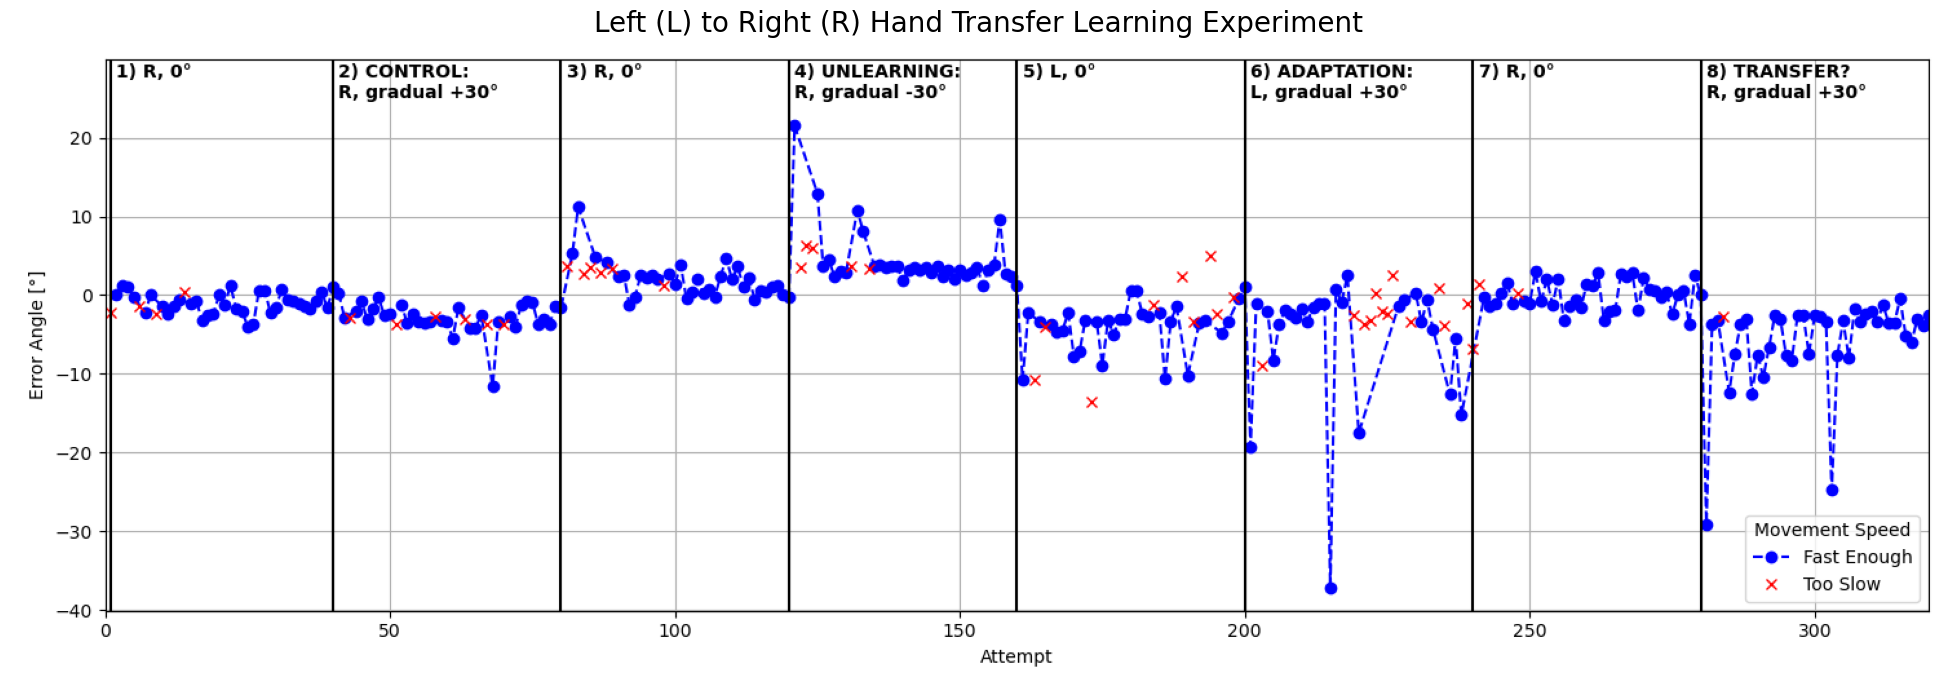

In [17]:
transfer_learning_result = plt.imread("errorsexp3.png")
plt.figure(figsize=(25, 10))
plt.imshow(transfer_learning_result)
plt.title("Left (L) to Right (R) Hand Transfer Learning Experiment", fontsize=20)
plt.axis("off")
plt.show()

(Here the explanation of the admittedly over-engineered experiment: 

The basic idea is to compare case A) adaptation with only the right hand (corresponding to 1-2) to case B) adaptation with the right hand after adaptation with the left hand (corresponding to 5-8). We hypothesize no transfer learning between the hands, and thus expect to see no significant differences in adaptation of the right hand during case A) and B). 

1) Right hand, no pertubation 
2) Control: Right hand, gradual +30° pertubation. Adaption for case A).
3) Right hand, no pertubation. An after-effect validates motor adaptation during 3.
4) Unlearning: Right hand, gradual -30° pertubation. According ot lecture 2, this should decouple transfer learning between case A) and B).
5) Left hand, no pertubation. An after-effect would be expected for transfer learning from right to left hand. 
6) Left hand, gradual +30° pertubation. Adaptation of left hand for case B).
7) Right hand, no pertubation. An after-effect would be expected for transfer learning from left to right hand.
8) Right hand,  gradual +30° pertubation. Faster adaptation and lower error magnitude compared to the control would be expected for transfer learning.

We neither observe significant after-affect during 5) nor 7), and no faster adaptation or lower error magnitude in 8) compared to 2). Actually, we find a higher error magnitude, which the subject explained with moving much faster due to being bored, as also observed (more red crosses in 2) compared to 8)). This suggests that motor adaptation of left and right hand are independent, at least for this task. 

)